In [1]:
# Module 3
# BAM-3034: Sentiment Analysis & Text Mining

## Normalization

In [2]:
import numpy as np
# Example data
data = [50, 20, 30, 80, 100]
# Min-Max Normalization
def min_max_normalization(data):
    min_val = min(data)
    max_val = max(data)
    normalized = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized
normalized_data = min_max_normalization(data)
print("Min-Max Normalized Data:", normalized_data)

Min-Max Normalized Data: [0.375, 0.0, 0.125, 0.75, 1.0]


In [3]:
# Z-Score Normalization
def z_score_normalization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    normalized = [(x - mean) / std_dev for x in data]
    return normalized
z_score_normalized_data = z_score_normalization(data)
print("Z-Score Normalized Data:", z_score_normalized_data)


Z-Score Normalized Data: [-0.1995570315713218, -1.1973421894279308, -0.8647471368090611, 0.7982281262852872, 1.4634182315230264]


## Preprocessing

In [4]:


import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk, FreqDist

# Download necessary NLTK resources
# nltk.download("all")

# -------------------------------
# Input Text
# -------------------------------
text = """ Ottawa News: Canada’s central bank will make its first interest rate decision of 2026 on Wednesday and many economists expect no changes. 
In fact, barring any unforeseen circumstances, it may hold steady for the rest of the year.
The next scheduled date for announcing the overnight rate target is March 18, 2026.
 The Bank’s next MPR will be released on April 29, 2026."""

print("Original Text:\n", text)


Original Text:
  Ottawa News: Canada’s central bank will make its first interest rate decision of 2026 on Wednesday and many economists expect no changes. 
In fact, barring any unforeseen circumstances, it may hold steady for the rest of the year.
The next scheduled date for announcing the overnight rate target is March 18, 2026.
 The Bank’s next MPR will be released on April 29, 2026.


In [5]:
# -------------------------------
# 1. Tokenization
# -------------------------------
print("\n--- 1. Tokenization ---")
sentences = sent_tokenize(text)
terms = word_tokenize(text)

print("Sentence Tokenization:", sentences)
print("Word Tokenization:", terms)



--- 1. Tokenization ---
Sentence Tokenization: [' Ottawa News: Canada’s central bank will make its first interest rate decision of 2026 on Wednesday and many economists expect no changes.', 'In fact, barring any unforeseen circumstances, it may hold steady for the rest of the year.', 'The next scheduled date for announcing the overnight rate target is March 18, 2026.', 'The Bank’s next MPR will be released on April 29, 2026.']
Word Tokenization: ['Ottawa', 'News', ':', 'Canada', '’', 's', 'central', 'bank', 'will', 'make', 'its', 'first', 'interest', 'rate', 'decision', 'of', '2026', 'on', 'Wednesday', 'and', 'many', 'economists', 'expect', 'no', 'changes', '.', 'In', 'fact', ',', 'barring', 'any', 'unforeseen', 'circumstances', ',', 'it', 'may', 'hold', 'steady', 'for', 'the', 'rest', 'of', 'the', 'year', '.', 'The', 'next', 'scheduled', 'date', 'for', 'announcing', 'the', 'overnight', 'rate', 'target', 'is', 'March', '18', ',', '2026', '.', 'The', 'Bank', '’', 's', 'next', 'MPR', 'w

In [6]:
# -------------------------------
# 2. Stop Words Removal
# -------------------------------
print("\n--- 2. Stop Words Removal ---")
stop_words = set(stopwords.words("english"))
filtered_words = [x for x in terms if x.lower() not in stop_words and x.isalnum()]

print("Filtered Words:", filtered_words)


--- 2. Stop Words Removal ---
Filtered Words: ['Ottawa', 'News', 'Canada', 'central', 'bank', 'make', 'first', 'interest', 'rate', 'decision', '2026', 'Wednesday', 'many', 'economists', 'expect', 'changes', 'fact', 'barring', 'unforeseen', 'circumstances', 'may', 'hold', 'steady', 'rest', 'year', 'next', 'scheduled', 'date', 'announcing', 'overnight', 'rate', 'target', 'March', '18', '2026', 'Bank', 'next', 'MPR', 'released', 'April', '29', '2026']


In [7]:
# -------------------------------
# 3. Text Normalization
# -------------------------------
print("\n--- 3. Text Normalization ---")
# 3.1 Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in filtered_words]
print("Stemming:", stemmed_words)

# 3.2 Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(w.lower()) for w in stemmed_words]
print("Lemmatization:", lemmatized_words)


--- 3. Text Normalization ---
Stemming: ['ottawa', 'new', 'canada', 'central', 'bank', 'make', 'first', 'interest', 'rate', 'decis', '2026', 'wednesday', 'mani', 'economist', 'expect', 'chang', 'fact', 'bar', 'unforeseen', 'circumst', 'may', 'hold', 'steadi', 'rest', 'year', 'next', 'schedul', 'date', 'announc', 'overnight', 'rate', 'target', 'march', '18', '2026', 'bank', 'next', 'mpr', 'releas', 'april', '29', '2026']
Lemmatization: ['ottawa', 'new', 'canada', 'central', 'bank', 'make', 'first', 'interest', 'rate', 'decis', '2026', 'wednesday', 'mani', 'economist', 'expect', 'chang', 'fact', 'bar', 'unforeseen', 'circumst', 'may', 'hold', 'steadi', 'rest', 'year', 'next', 'schedul', 'date', 'announc', 'overnight', 'rate', 'target', 'march', '18', '2026', 'bank', 'next', 'mpr', 'releas', 'april', '29', '2026']


## Part of speech tagging

In [8]:
# -------------------------------
# POS Tagging
# -------------------------------
print("\n--- Parts of Speech (POS) Tagging ---")
pos_tags = pos_tag(filtered_words)
print("POS Tags:", pos_tags)


--- Parts of Speech (POS) Tagging ---
POS Tags: [('Ottawa', 'NNP'), ('News', 'NNP'), ('Canada', 'NNP'), ('central', 'JJ'), ('bank', 'NN'), ('make', 'VBP'), ('first', 'JJ'), ('interest', 'NN'), ('rate', 'NN'), ('decision', 'NN'), ('2026', 'CD'), ('Wednesday', 'NNP'), ('many', 'JJ'), ('economists', 'NNS'), ('expect', 'VBP'), ('changes', 'NNS'), ('fact', 'NN'), ('barring', 'VBG'), ('unforeseen', 'JJ'), ('circumstances', 'NNS'), ('may', 'MD'), ('hold', 'VB'), ('steady', 'JJ'), ('rest', 'JJ'), ('year', 'NN'), ('next', 'RB'), ('scheduled', 'VBN'), ('date', 'NN'), ('announcing', 'VBG'), ('overnight', 'JJ'), ('rate', 'NN'), ('target', 'NN'), ('March', 'NNP'), ('18', 'CD'), ('2026', 'CD'), ('Bank', 'NNP'), ('next', 'JJ'), ('MPR', 'NNP'), ('released', 'VBD'), ('April', 'NNP'), ('29', 'CD'), ('2026', 'CD')]


## Named Entity Recognition (NER)


In [9]:
# -------------------------------
# Named Entity Recognition (NER)
# -------------------------------
print("\n--- Named Entity Recognition ---")
ner_tree = ne_chunk(pos_tags)
print("Named Entities:")
print(ner_tree)



--- Named Entity Recognition ---
Named Entities:
(S
  (PERSON Ottawa/NNP)
  (ORGANIZATION News/NNP Canada/NNP)
  central/JJ
  bank/NN
  make/VBP
  first/JJ
  interest/NN
  rate/NN
  decision/NN
  2026/CD
  Wednesday/NNP
  many/JJ
  economists/NNS
  expect/VBP
  changes/NNS
  fact/NN
  barring/VBG
  unforeseen/JJ
  circumstances/NNS
  may/MD
  hold/VB
  steady/JJ
  rest/JJ
  year/NN
  next/RB
  scheduled/VBN
  date/NN
  announcing/VBG
  overnight/JJ
  rate/NN
  target/NN
  March/NNP
  18/CD
  2026/CD
  (ORGANIZATION Bank/NNP)
  next/JJ
  (ORGANIZATION MPR/NNP)
  released/VBD
  April/NNP
  29/CD
  2026/CD)


## Frequency Distribution of Words


--- Frequency Distribution ---
Top 5 Most Common Words: [('2026', 3), ('rate', 2), ('next', 2), ('Ottawa', 1), ('News', 1)]


<Axes: title={'center': 'Word Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

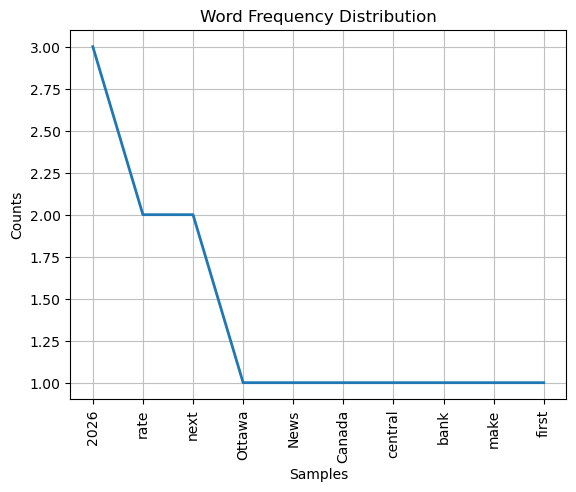

In [10]:
# -------------------------------
# Frequency Distribution
# -------------------------------
print("\n--- Frequency Distribution ---")
freq_dist = FreqDist(filtered_words)
print("Top 5 Most Common Words:", freq_dist.most_common(5))
freq_dist.plot(10, title="Word Frequency Distribution")

## Synonyms and Antonyms

In [11]:
# -------------------------------
# Synonyms and Antonyms
# -------------------------------
print("\n--- Synonyms and Antonyms ---")
word_choice = "barring"  # You can change this word
synonyms = []
antonyms = []

for syn in wordnet.synsets(word_choice):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

print(f"Word: {word_choice}")
print("Synonyms:", set(synonyms))
print("Antonyms:", set(antonyms))


--- Synonyms and Antonyms ---
Word: barring
Synonyms: {'bar', 'blockade', 'relegate', 'stop', 'blackball', 'block_off', 'barring', 'block_up', 'barricade', 'debar', 'banish', 'exclude', 'block'}
Antonyms: {'unbar'}


# one_hot_encode

In [12]:
def one_hot_encode(text):
    words = text.split()
    vocabulary = set(words)
    word_to_index = {word: i for i, word in enumerate(vocabulary)}
    one_hot_encoded = []
    for word in words:
        one_hot_vector = [0] * len(vocabulary)
        one_hot_vector[word_to_index[word]] = 1
        one_hot_encoded.append(one_hot_vector)
    return one_hot_encoded, word_to_index, vocabulary

example_text = "Lambton College has made the decision to close the Ottawa campus."


one_hot_encoded, word_to_index, vocabulary = one_hot_encode(example_text)

print("Vocabulary:", vocabulary)
print("Word to Index Mapping:", word_to_index)
print("One-Hot Encoded Matrix:")
for word, encoding in zip(example_text.split(), one_hot_encoded):
    print(f"{word}: {encoding}")

Vocabulary: {'to', 'Ottawa', 'Lambton', 'close', 'the', 'campus.', 'has', 'College', 'decision', 'made'}
Word to Index Mapping: {'to': 0, 'Ottawa': 1, 'Lambton': 2, 'close': 3, 'the': 4, 'campus.': 5, 'has': 6, 'College': 7, 'decision': 8, 'made': 9}
One-Hot Encoded Matrix:
Lambton: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
College: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
has: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
made: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
the: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
decision: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
to: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
close: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
the: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Ottawa: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
campus.: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


# Bag of words (BoW) 


In [ ]:
#Step 1: Preprocessing the Text
import re

text = """Lambton College has more than 70 post-secondary programs and apprenticeships,academic upgrading, post-graduate, part-time and training programs. 
Recently, the College has made the decision to close the Ottawa campus. Students will have the opportunity to complete their programs.
Its physical presence at the Ottawa campus will remain until December 31, 2026."""

dataset = nltk.sent_tokenize(text)

for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

for i, sentence in enumerate(dataset):
    print(f"Sentence {i+1}: {sentence}")

Sentence 1: lambton college has more than 70 post secondary programs and apprenticeships academic upgrading post graduate part time and training programs 
Sentence 2: recently the college has made the decision to close the ottawa campus 
Sentence 3: students will have the opportunity to complete their programs 
Sentence 4: its physical presence at the ottawa campus will remain until december 31 2026 


In [14]:
# Step 2: Counting Word Frequencies
import pandas as pd
word2count = {}

for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

stop_words = set(stopwords.words('english'))

filtered_word2count = {word: count for word, count in word2count.items() if word not in stop_words}

word_freq_df = pd.DataFrame(list(filtered_word2count.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df)

               Word  Frequency
5          programs          3
3              post          2
18           campus          2
17           ottawa          2
1           college          2
0           lambton          1
16            close          1
26               31          1
25         december          1
24           remain          1
23         presence          1
22         physical          1
21         complete          1
20      opportunity          1
19         students          1
14             made          1
15         decision          1
13         recently          1
12         training          1
11             time          1
10             part          1
9          graduate          1
8         upgrading          1
7          academic          1
6   apprenticeships          1
4         secondary          1
2                70          1
27             2026          1


Top 10 frequent words: ['the', 'programs', 'college', 'has', 'post', 'and', 'to', 'ottawa', 'campus', 'will']


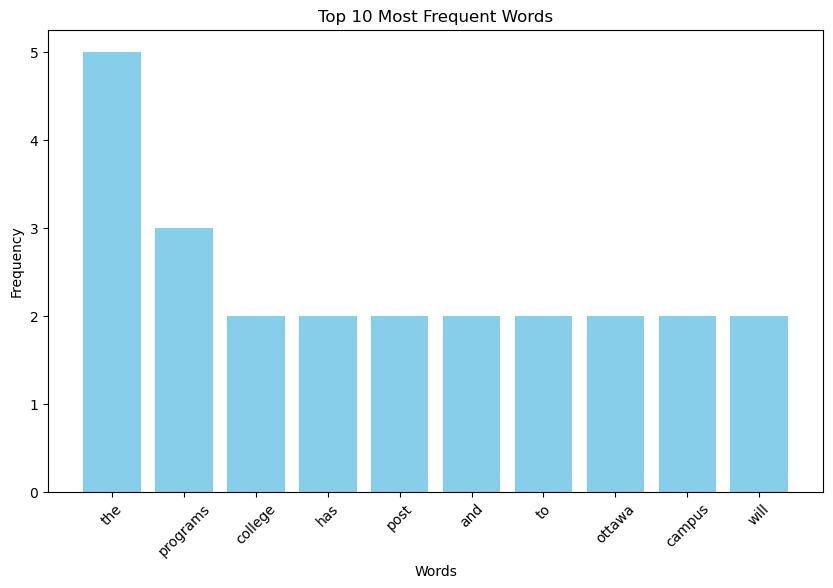

In [15]:
#Step 3: Selecting the Most Frequent Words
import heapq
import matplotlib.pyplot as plt

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(f"Top 10 frequent words: {freq_words}")

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

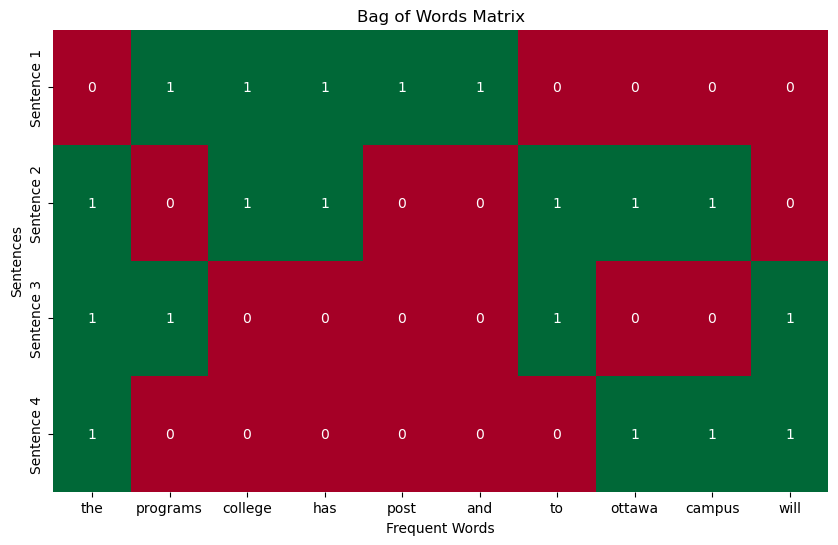

In [16]:
# Step 4: Building the Bag of Words (BoW) Model
import numpy as np
import seaborn as sns

X = []

for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)

X = np.asarray(X)

plt.figure(figsize=(10, 6))
sns.heatmap(X, cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=freq_words, yticklabels=[f"Sentence {i+1}" for i in range(len(dataset))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

In [19]:
# Uncomment the line below to install the wordcloud library if not already installed
#!pip install wordcloud

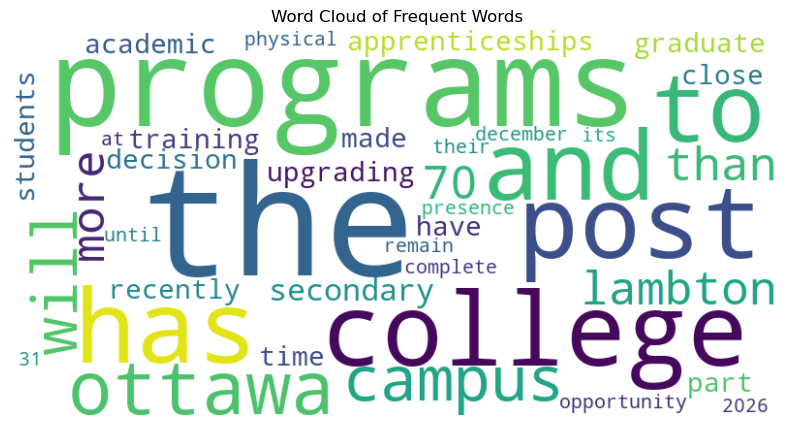

In [20]:
# Step 5: Visualizing Word Frequencies with a Word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word2count)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()